# DRUG CLASSIFICATION USING RANDOM FOREST

In [66]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
df = pd.read_csv('Datasets/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [29]:
df.isna().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

Encoding Categorical Data

In [18]:
encoder = LabelEncoder()

In [27]:
encoder.fit(df.Sex.drop_duplicates())
df.Sex = encoder.transform(df.Sex)
encoder.fit(df.BP.drop_duplicates())
df.BP = encoder.transform(df.BP)
encoder.fit(df.Cholesterol.drop_duplicates())
df.Cholesterol = encoder.transform(df.Cholesterol)
encoder.fit(df.Drug.drop_duplicates())
df.Drug = encoder.transform(df.Drug)

In [28]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


Splitting the data

In [36]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)

In [54]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [55]:
y_pred = rf.predict(X_test)

In [56]:
accuracy = accuracy_score(y_test, y_pred)
accuracy*100

100.0

In [63]:
print('precision', precision_score(y_test, y_pred, average='macro')*100)
print('recall', recall_score(y_test, y_pred, average='macro'))            


precision 100.0
recall 1.0


In [68]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[33,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0,  0, 25]], dtype=int64)

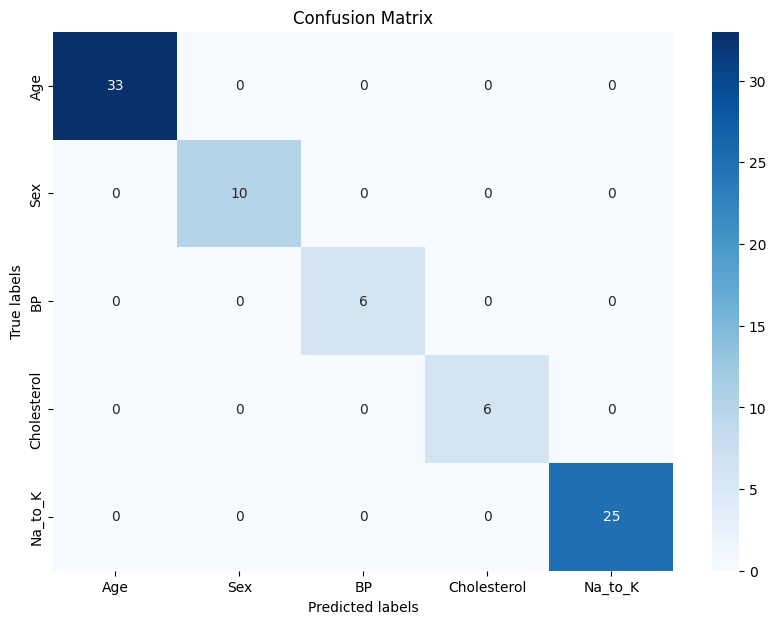

In [72]:
# Labels for your classes
classes = ['Age', 'Sex', 'BP','Cholesterol','Na_to_K']  # Replace with your actual class names
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
